# EDA 
In this notebook I perform EDA on calendar.csv file 

In [1]:
#import required python packages
import numpy as np 
import matplotlib.pyplot as plt 
import calendar
import pandas as pd 
%matplotlib inline

In [2]:
df_calendar = pd.read_csv("calendar.csv")
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
#Adding some more features like months for indepth analysis
df_calendar['Date_norm'] = pd.to_datetime(df_calendar['date'], dayfirst=False) 
df_calendar['month'] = df_calendar['Date_norm'].dt.month  

In [4]:
df_calendar.head()

,listing_id,date,available,price,Date_norm,month
0,241032,2016-01-04,t,$85.00,2016-01-04,1
1,241032,2016-01-05,t,$85.00,2016-01-05,1
2,241032,2016-01-06,f,NaN,2016-01-06,1
3,241032,2016-01-07,f,NaN,2016-01-07,1
4,241032,2016-01-08,f,NaN,2016-01-08,1


## In the following cells I analyse the price fluctuation during 2016

In [5]:
df_calendar.price = df_calendar.price.str.replace(r'$', '')
df_calendar.price = df_calendar.price.str.replace(r',', '').astype(float)

In [6]:
t2 = df_calendar.groupby(['listing_id','month'])["price"].mean()
t3 =  df_calendar.groupby(['month'])["price"].mean()


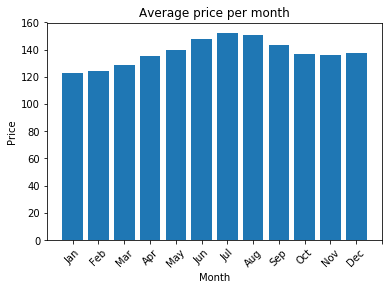

In [7]:
plt.bar(range(len(t3)), t3, align='center')
plt.xticks(np.arange(0,13),calendar.month_abbr[1:13],rotation=45)
plt.title("Average price per month")
plt.xlabel("Month")
plt.ylabel("Price")
plt.savefig('AveragePriceMonthwise.jpg', bbox_inches="tight")
plt.show()

In [8]:
t2 = df_calendar.groupby(['listing_id'])["price"].std()

In [9]:
t2.describe() 

count    3716.000000
mean       12.272805
std        22.859473
min         0.000000
25%         0.000000
50%         3.442197
75%        13.589837
max       356.322687
Name: price, dtype: float64

In [10]:
print((t2 == 0).mean())

0.41932949188056573


## Nearly 40% of the listings have constant rate in the year 2016. Mean change is $12 there is fluctuation in price over the months. For few, the price fluctation is zero 

## In the following cells I analyse availabilty of rentals in seattle

In [11]:
df_calendar.available = df_calendar.available.str.replace(r'f', '0')
df_calendar.available = df_calendar.available.str.replace(r't', '1')
df_calendar.available = df_calendar.available.astype(int)

In [12]:
busy_months = df_calendar.groupby(["month"])["available"].mean()

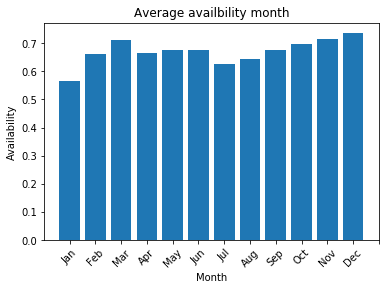

In [13]:
plt.bar(range(len(busy_months)), busy_months, align='center')
plt.xticks(np.arange(0,13),calendar.month_abbr[1:13],rotation=45)
plt.title("Average availbility month")
plt.xlabel("Month")
plt.ylabel("Availability")
plt.savefig("AvgAvailabiltyMonthwise.jpg", bbox_inches="tight")
plt.show()

In [14]:
vacancy_75 = sum(df_calendar.groupby(["listing_id"])["available"].mean() > 0.75 )
vacancy_1 = sum(df_calendar.groupby(["listing_id"])["available"].mean() == 1.0 )
print("Number of rentals that were vacant for more than 8 months : {}".format(vacancy_75))
print("Number of rentals that were vacant throughout the year : {}".format(vacancy_1))

Number of rentals that were vacant for more than 8 months : 2139
Number of rentals that were vacant throughout the year : 678
